# 🚀 Lab 3: Convolutional Neural Networks - A Visual Discovery Journey
### **Instructor: Andrea Ramirez-Salgado, PhD.**

## Welcome, Computer Vision Pioneer!

Have you ever wondered how your phone recognizes your face, or how self-driving cars "see" pedestrians? The secret lies in **Convolutional Neural Networks (CNNs)** - a breakthrough that revolutionized computer vision. In this lab, you'll not just learn about CNNs, you'll build one from scratch, watch it learn to recognize objects, and even peek inside its "brain" to see what it's thinking!

### 🎯 What You'll Discover
- **Why convolutions?** Understand why CNNs dominate computer vision
- **Architecture secrets**: Build a modern CNN with proper design patterns
- **Training techniques**: Master data augmentation, learning rate scheduling, and early stopping
- **Visual understanding**: See what your CNN is actually learning through filter visualization
- **Real-world performance**: Achieve >80% accuracy on CIFAR-10 image classification

### 🧪 Your Lab Philosophy
1. **Experiment First**: Try things, make mistakes, learn from them
2. **Visualize Everything**: See what's happening under the hood
3. **Connect Concepts**: Understand the "why" behind the "what"
4. **Build Confidence**: Progress from basics to advanced challenges

### 📊 Your Progress Tracker
Throughout this lab, you'll complete:
- 🔵 **Discovery Tasks**: Explore and experiment (4 tasks)
- 🟢 **Implementation Tasks**: Build real components (7 tasks)
- 🟡 **Reflection Tasks**: Deepen understanding (3 checkpoints)
- 📊 **Visualizations**: See your CNN in action (4 visualizations)
- 🔴 **Challenge Tasks**: Push your boundaries (4 challenges)

**Pro Tip**: Don't rush! The goal is deep understanding, not speed. When you see your CNN correctly classifying images for the first time, you'll appreciate every step of this journey.

---

Let's begin! 🎓

---

# Part 0: Setup - Your Deep Learning Toolkit 🛠️

## Installation Recommendation

If you haven't already, create a dedicated conda environment:

```bash
conda create -n deep-learning python=3.9
conda activate deep-learning
conda install pytorch torchvision -c pytorch
conda install matplotlib seaborn scikit-learn
```

## Import Libraries

We'll use PyTorch for building our CNN, torchvision for datasets, and matplotlib for visualization.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print(f"✅ PyTorch version: {torch.__version__}")
print(f"✅ Torchvision version: {torchvision.__version__}")
print("\n🎉 You're all set! Let's dive into CNNs!")

✅ PyTorch version: 2.10.0+cpu
✅ Torchvision version: 0.25.0+cpu

🎉 You're all set! Let's dive into CNNs!


## Device Setup: Harness the Power of Your GPU

Deep learning models train much faster on GPUs. Let's check what you have available!

### 🟢 TASK 1: Configure Your Computing Device

**Your Mission**: Set up device configuration to use GPU if available, otherwise fallback to CPU.

**What to do**:
1. Create a variable `device` that checks if CUDA (GPU) is available
2. Print whether you're using GPU or CPU
3. If using GPU, print its name

**Hint**: Use `torch.cuda.is_available()` and `torch.cuda.get_device_name(0)`

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# Print device information
print(f"Using device: {device}")

if device == "cuda":
    print("GPU name:", torch.cuda.get_device_name(0))

Using device: cpu


---

# Part 1: Data Pipeline - The Foundation of Good Training 📊

## Why This Matters

Imagine trying to learn to identify birds from photos, but every photo is taken from a different angle, lighting condition, and zoom level. That's exactly what CNNs face! **Data augmentation** is like giving your CNN diverse training examples - it's the difference between a model that memorizes specific images and one that truly understands object features.

In this section, you'll work with **CIFAR-10**, a classic computer vision dataset containing 60,000 tiny (32×32 pixel) color images across 10 categories: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Your CNN will learn to distinguish between these categories with superhuman accuracy!

**Real-world connection**: The same augmentation techniques you'll use here power production systems at Google, Tesla, and medical imaging companies. You're learning industry-standard practices!

## Understanding CIFAR-10 Dataset

**Dataset Statistics**:
- **Total images**: 60,000 color images (32×32 pixels)
- **Training set**: 50,000 images
- **Test set**: 10,000 images
- **Classes**: 10 categories (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)
- **Challenge**: Small image size makes classification harder - great for learning!

Let's see what a proper data pipeline looks like.

## 🔵 Discovery 1: Understanding Data Augmentation

**Your Mission**: Understand why we apply different transformations to training vs. test data.

Below is a fully-commented training data transformation pipeline. Study it carefully - each transformation serves a purpose!

In [3]:
# ------------------------------------------------------------------------------
# Data Augmentation and Normalization for Training
# ------------------------------------------------------------------------------
transform_train = transforms.Compose([
    # Randomly crops the image to 32x32 with a padding of 4 pixels.
    # Rationale:
    # - Adds slight variations in image positioning to prevent the model from 
    #   overfitting to specific pixel locations.
    # - Helps the model become more robust to spatial variations in objects.
    # - The padding (4 pixels) temporarily increases image size to 40x40, from 
    #   which a random 32x32 region is cropped.
    transforms.RandomCrop(32, padding=4),  

    # Randomly flips images horizontally with a probability of 0.5.
    # Rationale:
    # - Introduces flip-based augmentation, making the model invariant to 
    #   left-right orientations of objects.
    # - Prevents over-reliance on specific left-right patterns in the dataset.
    # - Horizontal flipping is suitable for CIFAR-10 classes like cars, animals, 
    #   and ships, but vertical flipping is avoided as it might distort object meaning.
    transforms.RandomHorizontalFlip(),     

    # Converts images from PIL format to PyTorch tensors.
    # Rationale:
    # - Converts image data from integer values (0-255) to floating-point values (0-1).
    # - Enables PyTorch operations for deep learning models.
    transforms.ToTensor(),                 

    # Normalizes images using CIFAR-10's channel-wise mean and standard deviation.
    # Rationale:
    # - Standardizes the dataset to improve training stability.
    # - Ensures that all input features have a consistent scale, reducing issues with 
    #   different ranges of pixel intensities.
    # - The mean and std values were computed from the CIFAR-10 dataset:
    #   - Mean: [0.4914, 0.4822, 0.4465] (R, G, B channels)
    #   - Std:  [0.2470, 0.2435, 0.2616] (R, G, B channels)
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  
                         std=[0.2470, 0.2435, 0.2616])   
])

print("✅ Training transformation pipeline created!")

✅ Training transformation pipeline created!


### 🟡 Reflection Checkpoint 1

Before moving on, think about these questions:

1. **Why augmentation?**: Why do we apply RandomCrop and RandomHorizontalFlip to training data but not test data?

*Your answer:* Data augmentation is applied to the training data to increase diversity and help the model learn features that are robust to samll spatial changes. If applying random transformation s to test data would introduce veriability and make evaluation results inconsistent and non-reproducible.


2. **Normalization intuition**: Why might normalizing images help with training? (Hint: Think about gradient descent)

*Your answer:* It hleps ensure that input features have a consistent scale, which can improves the stability and efficiency of gradient descent.When gradients become better conditioned, leading to faster convergence and more stable parameter updates during training. 


3. **Vertical flipping**: The code doesn't use RandomVerticalFlip. Why might that be inappropriate for CIFAR-10?

*Your answer:* Because it can distort the semantic meaning od objects in CIFAR-10 and maybe confuse the model and degrading generalization performance.

### 🟢 TASK 2: Create the Test Data Transformation Pipeline

**Your Mission**: Build a transformation pipeline for test/validation data.

**Key principle**: Test data should be evaluated on clean, unaltered images. We want to know how well our model performs in the real world, not on artificially augmented data.

**What to include**:
1. ✅ Convert images to tensors (`transforms.ToTensor()`)
2. ✅ Apply normalization with the **same** mean and std as training
3. ❌ NO data augmentation (no RandomCrop, no RandomHorizontalFlip)

**Why?**: We augment training data to teach the model to be robust, but we test on clean data to measure true performance.

Create your pipeline below using `transforms.Compose()`:

In [4]:
# Your code here
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])

print("✅ Test transformation pipeline created!")

✅ Test transformation pipeline created!


## Loading CIFAR-10 Dataset

Now let's download the actual images. PyTorch makes this incredibly easy with `torchvision.datasets`!

In [5]:
# Download CIFAR-10 training dataset
print("Downloading CIFAR-10 training data...")
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform_train
)
print(f"✅ Training dataset loaded: {len(train_dataset)} images")

✅ Training dataset loaded: 50000 images


### 🟢 TASK 3: Download CIFAR-10 Test Dataset

**Your Mission**: Load the test dataset with your test transformation pipeline.

**Hint**: Very similar to the training dataset, but set `train=False` and use `transform_test`

In [6]:
import torchvision
from torchvision import datasets

# Load CIFAR-10 test dataset
test_dataset = datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transform_test
)

print(f"✅ Test dataset loaded: {len(test_dataset)} images")

✅ Test dataset loaded: 10000 images


## Creating a Validation Split

**Important concept**: We use three datasets in deep learning:
- **Training**: Teaches the model (90% of training data)
- **Validation**: Tunes hyperparameters and prevents overfitting (10% of training data)
- **Test**: Final evaluation only (kept separate, never seen during training)

Let's create a validation split from our training data.

In [7]:
# Calculate validation size (10% of training data)
val_size = int(0.1 * len(train_dataset))
train_size = len(train_dataset) - val_size

# Split the dataset
train_dataset, val_dataset = random_split(
    train_dataset, 
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)  # For reproducibility
)

print(f"✅ Data split complete!")
print(f"   Training images: {len(train_dataset):,}")
print(f"   Validation images: {len(val_dataset):,}")
print(f"   Test images: {len(test_dataset):,}")

✅ Data split complete!
   Training images: 45,000
   Validation images: 5,000
   Test images: 10,000


### 🟢 TASK 4: Create DataLoaders

**Your Mission**: Create DataLoaders to efficiently feed batches of data to your model.

**Why DataLoaders?**: They handle batching, shuffling, and parallel data loading automatically!

**Configuration**:
- **Batch size**: 128 (good balance between speed and memory)
- **Shuffle training**: Yes (prevents learning order biases)
- **Shuffle val/test**: No (consistent evaluation)
- **Num workers**: 2 (parallel data loading)

Create three DataLoaders: `train_loader`, `val_loader`, and `test_loader`

In [8]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)

print("✅ DataLoaders created!")
print(f"   Batches per epoch (training): {len(train_loader)}")
print(f"   Batches per epoch (validation): {len(val_loader)}")

✅ DataLoaders created!
   Batches per epoch (training): 352
   Batches per epoch (validation): 40


## 📊 Visualization 1: Exploring Your Data

Let's see what we're working with! Visualizing your data is crucial - you can't build a good model without understanding your data.

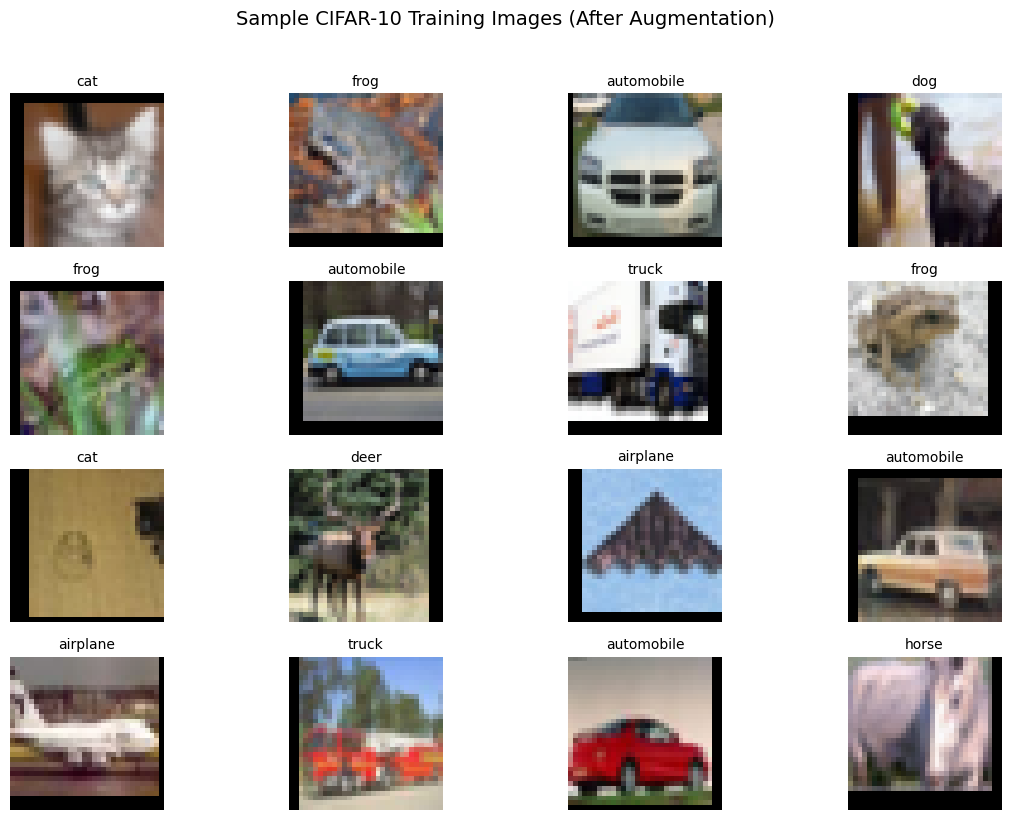


📊 Image shape: torch.Size([3, 32, 32]) (Channels, Height, Width)
📊 Batch shape: torch.Size([128, 3, 32, 32])
📊 Labels shape: torch.Size([128])


In [9]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Get a batch of training images
images, labels = next(iter(train_loader))

# Plot 16 random images
plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    
    # Convert from tensor to numpy and unnormalize
    img = images[i].numpy().transpose(1, 2, 0)
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2470, 0.2435, 0.2616])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    
    plt.imshow(img)
    plt.title(class_names[labels[i]], fontsize=10)
    plt.axis('off')

plt.suptitle('Sample CIFAR-10 Training Images (After Augmentation)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print(f"\n📊 Image shape: {images[0].shape} (Channels, Height, Width)")
print(f"📊 Batch shape: {images.shape}")
print(f"📊 Labels shape: {labels.shape}")

## ✅ Part 1 Complete!

You've built a complete data pipeline with:
- ✅ Proper data augmentation for training
- ✅ Clean transformations for testing
- ✅ Train/validation/test splits
- ✅ Efficient DataLoaders

**Key takeaway**: Good data preparation is 50% of the battle in deep learning!

---

# Part 2: CNN Architecture - Building Your Visual Cortex 🧠

## Why This Matters

Human brains have a visual cortex with specialized neurons for detecting edges, shapes, and eventually complex objects. CNNs work the same way! Early layers detect simple patterns (edges, colors), middle layers detect parts (eyes, wheels), and deep layers detect full objects (cats, cars).

**Key insight**: CNNs use **parameter sharing** through convolutional filters. Instead of learning separate weights for every pixel position (like fully-connected layers), they learn reusable filters that detect patterns anywhere in the image. This is why CNNs work so well for images!

In this section, you'll build a modern CNN architecture with:
- Convolutional layers (feature extractors)
- Batch normalization (training stabilizer)
- Pooling layers (spatial reduction)
- Dropout (overfitting prevention)
- Fully-connected head (final classification)

## Understanding CNN Components

### Core Building Blocks:

1. **Convolutional Layers** (`nn.Conv2d`)
   - Extract features using learnable filters
   - Parameters: `in_channels`, `out_channels`, `kernel_size`
   - Example: `nn.Conv2d(3, 64, kernel_size=3)` → 3 input channels (RGB), 64 output features, 3×3 filters

2. **Batch Normalization** (`nn.BatchNorm2d`)
   - Normalizes activations for stable training
   - Dramatically improves convergence speed
   - Always use after Conv layers!

3. **Activation Functions** (`F.relu`)
   - Introduces non-linearity (essential for learning complex patterns)
   - ReLU is the standard choice: `f(x) = max(0, x)`

4. **Pooling Layers** (`F.max_pool2d`)
   - Reduces spatial dimensions (downsampling)
   - Makes model more robust to small translations
   - Common: 2×2 max pooling (reduces size by 50%)

5. **Dropout** (`nn.Dropout`)
   - Randomly zeros out neurons during training
   - Prevents overfitting by forcing redundancy
   - Typical rate: 0.25-0.5

Let's see how they fit together!

### 🟢 TASK 5: Complete the CNN Architecture

**Your Mission**: Fill in the missing components of our CNN model.

**Architecture Overview**:
```
Input (3×32×32) 
  ↓
Conv Block 1: Conv(3→64) → BatchNorm → ReLU → MaxPool
  ↓ (64×16×16)
Conv Block 2: Conv(64→128) → BatchNorm → ReLU → MaxPool → Dropout
  ↓ (128×8×8)
Conv Block 3: Conv(128→256) → BatchNorm → ReLU → MaxPool → Dropout
  ↓ (256×4×4)
Flatten → FC(4096→512) → ReLU → Dropout → FC(512→10)
  ↓
Output (10 classes)
```

**Your tasks**:
1. Define the missing convolutional layers
2. Define the missing batch normalization layers
3. Complete the forward pass logic

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        
        # ===== YOUR CODE: Define Convolutional Layers =====
        # Conv Block 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)  # 3 → 64
        self.bn1 = nn.BatchNorm2d(64)
        
        # Conv Block 2  
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # 64 → 128
        self.bn2 = nn.BatchNorm2d(128)
        
        # Conv Block 3
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)  # 128 → 256
        self.bn3 = nn.BatchNorm2d(256)
        # ===== END YOUR CODE =====
        
        # Dropout layers
        self.dropout_conv = nn.Dropout(0.25)
        self.dropout_fc = nn.Dropout(0.5)
        
        # Fully connected layers
        # After 3 max pools (2×2), image is 4×4
        # Channels: 256, so flattened size = 256 × 4 × 4 = 4096
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)  # 10 CIFAR-10 classes
    
    def forward(self, x):
        # ===== YOUR CODE: Complete Forward Pass =====
        
        # Conv Block 1: Conv → BatchNorm → ReLU → MaxPool
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        
        # Conv Block 2: Conv → BatchNorm → ReLU → MaxPool → Dropout
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout_conv(x)
        
        # Conv Block 3: Conv → BatchNorm → ReLU → MaxPool → Dropout
        x = self.conv3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout_conv(x)
        
        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)  # (batch, 256, 4, 4) → (batch, 4096)
        
        # Fully connected layers
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout_fc(x)
        x = self.fc2(x)  # Final output (CrossEntropyLoss expects logits)
        
        # ===== END YOUR CODE =====
        
        return x

# Create model instance and move to device
model = ImprovedCNN().to(device)

print("✅ CNN model created!")
print(f"\n📊 Model Summary:")
print(f"   Total parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"   Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

✅ CNN model created!

📊 Model Summary:
   Total parameters: 2,474,506
   Trainable parameters: 2,474,506


### 🔵 Discovery 2: Understanding Model Size

**Your Mission**: Calculate and understand where the parameters come from.

Let's break down the parameter count:

In [11]:
print("Parameter Breakdown by Layer:\n" + "="*50)

for name, param in model.named_parameters():
    print(f"{name:20s} | Shape: {str(param.shape):20s} | Params: {param.numel():>8,}")

print("="*50)
print(f"Total: {sum(p.numel() for p in model.parameters()):,} parameters")

Parameter Breakdown by Layer:
conv1.weight         | Shape: torch.Size([64, 3, 3, 3]) | Params:    1,728
conv1.bias           | Shape: torch.Size([64])     | Params:       64
bn1.weight           | Shape: torch.Size([64])     | Params:       64
bn1.bias             | Shape: torch.Size([64])     | Params:       64
conv2.weight         | Shape: torch.Size([128, 64, 3, 3]) | Params:   73,728
conv2.bias           | Shape: torch.Size([128])    | Params:      128
bn2.weight           | Shape: torch.Size([128])    | Params:      128
bn2.bias             | Shape: torch.Size([128])    | Params:      128
conv3.weight         | Shape: torch.Size([256, 128, 3, 3]) | Params:  294,912
conv3.bias           | Shape: torch.Size([256])    | Params:      256
bn3.weight           | Shape: torch.Size([256])    | Params:      256
bn3.bias             | Shape: torch.Size([256])    | Params:      256
fc1.weight           | Shape: torch.Size([512, 4096]) | Params: 2,097,152
fc1.bias             | Shape: torch.

### 🟡 Reflection Checkpoint 2

1. **Parameter efficiency**: Why does conv1 have so few parameters compared to fc1? (Hint: parameter sharing)

*Your answer:* Because the number of parameters depends only on the filter size and the number of input and outoput chaanels, but the conv1 assigh a unique weight to every input-output connection.

2. **Batch normalization**: What does batch normalization do, and why is it important after convolutions?

*Your answer:* Batch normalization normalizes the activations of each channel to have a stable mean and variance during training. And batch normalization helps ensure that feature distributions remain well-conditioned before applying non-linear activation functions.


3. **Dropout placement**: Why do we use dropout after some layers but not others?

*Your answer:* Dropout is mainly used in layers with a large number of parameters. Applying dropout too early or too frequently in convolutional layers may disrupt spatial feature learning.

## ✅ Part 2 Complete!

You've built a modern CNN with:
- ✅ Three convolutional blocks for hierarchical feature learning
- ✅ Batch normalization for training stability
- ✅ Dropout for regularization
- ✅ Fully-connected head for classification

**Next up**: Train this network and watch it learn!

---

# Part 3: Training Loop - Teaching Your CNN to See 🏋️

## Why This Matters

Training a CNN is like coaching an athlete: you need the right training plan (optimizer), recovery schedule (learning rate), and progress tracking (validation). Do it right, and you'll achieve amazing results. Rush it, and you'll overfit or underperform.

In this section, you'll implement:
- **Loss function**: CrossEntropyLoss (perfect for classification)
- **Optimizer**: AdamW (adaptive learning with weight decay)
- **Learning rate scheduling**: Cosine annealing (gradually decreases LR)
- **Early stopping**: Stop when validation stops improving
- **Progress tracking**: Monitor both training and validation metrics

**Real-world connection**: These exact techniques are used at scale by companies like OpenAI, Google, and Meta to train models with billions of parameters!

## Training Configuration

Let's set up our training components:

In [12]:
# Loss function: CrossEntropyLoss combines softmax and negative log-likelihood
# Perfect for multi-class classification!
criterion = nn.CrossEntropyLoss()

# Optimizer: AdamW (Adam with weight decay)
# - lr=0.001: Learning rate (step size for parameter updates)
# - weight_decay=1e-4: L2 regularization to prevent overfitting
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

# Learning rate scheduler: Cosine annealing
# Gradually decreases learning rate following a cosine curve
# Helps model fine-tune in later epochs
num_epochs = 50
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-6)

print("✅ Training configuration complete!")
print(f"   Loss function: CrossEntropyLoss")
print(f"   Optimizer: AdamW (lr=0.001)")
print(f"   Scheduler: CosineAnnealingLR")
print(f"   Total epochs: {num_epochs}")

✅ Training configuration complete!
   Loss function: CrossEntropyLoss
   Optimizer: AdamW (lr=0.001)
   Scheduler: CosineAnnealingLR
   Total epochs: 50


### 🟢 TASK 6: Implement Training Function

**Your Mission**: Complete the training function for one epoch.

**What happens in one training epoch**:
1. Set model to training mode
2. Loop through all training batches
3. For each batch:
   - Forward pass: get predictions
   - Calculate loss
   - Backward pass: compute gradients
   - Update weights
4. Track loss and accuracy

Fill in the missing pieces:

In [13]:
def train_one_epoch(model, dataloader, criterion, optimizer, device):
    """
    Train the model for one epoch.
    
    Returns:
        avg_loss: Average training loss
        accuracy: Training accuracy (0-100%)
    """
    model.train()  # Set to training mode (enables dropout, batchnorm training)
    
    total_loss = 0.0
    total_correct = 0
    total_samples = 0
    
    for images, labels in dataloader:
        # Move data to device
        images = images.to(device)
        labels = labels.to(device)
        
        # ===== YOUR CODE: Training Step =====
        
        # Zero gradients from previous step
        optimizer.zero_grad()
        
        # Forward pass: get predictions
        outputs = model(images)
        
        # Calculate loss
        loss = criterion(outputs, labels)
        
        # Backward pass: compute gradients
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        # ===== END YOUR CODE =====
        
        # Track statistics
        total_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
    
    avg_loss = total_loss / total_samples
    accuracy = 100.0 * total_correct / total_samples
    
    return avg_loss, accuracy

print("✅ Training function defined!")

✅ Training function defined!


### 🟢 TASK 7: Implement Validation Function

**Your Mission**: Complete the validation function.

**Key differences from training**:
- Use `model.eval()` (disables dropout, freezes batchnorm)
- Use `torch.no_grad()` (no gradient computation)
- No optimizer steps (we're only evaluating, not training)

In [15]:
def validate(model, dataloader, criterion, device):
    """
    Evaluate the model on validation/test data.
    
    Returns:
        avg_loss: Average validation loss
        accuracy: Validation accuracy (0-100%)
    """
    # ===== YOUR CODE: Set Model to Evaluation Mode =====
    model.eval()
    # ===== END YOUR CODE =====
    
    total_loss = 0.0
    total_correct = 0
    total_samples = 0
    
    # ===== YOUR CODE: Disable Gradient Computation =====
    # Hint: use 'with torch.no_grad():' context
    with torch.no_grad():
    # ===== END YOUR CODE =====
        
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass only (no backprop!)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Track statistics
            total_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
    
    avg_loss = total_loss / total_samples
    accuracy = 100.0 * total_correct / total_samples
    
    return avg_loss, accuracy

print("✅ Validation function defined!")

✅ Validation function defined!


### 🟢 TASK 8: Complete the Full Training Loop

**Your Mission**: Put it all together with progress tracking and early stopping.

**Components**:
- Train for multiple epochs
- Validate after each epoch
- Track best model (save when validation improves)
- Early stopping (stop if no improvement for 10 epochs)
- Learning rate scheduling

Study the provided code carefully - it's a complete production-ready training loop!

In [ ]:
import copy

# Training history tracking
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
learning_rates = []

# Early stopping configuration
best_val_loss = float('inf')
best_model_state = None
patience = 10  # Stop if no improvement for 10 epochs
patience_counter = 0

print("🚀 Starting training...\n")
print("Epoch | Train Loss | Train Acc | Val Loss | Val Acc | LR      | Status")
print("="*80)

for epoch in range(num_epochs):
    # ===== YOUR CODE: Training Phase =====
    train_loss, train_acc = train_one_epoch(
        model=model,
        dataloader=train_loader,
        criterion=criterion,
        optimizer=optimizer,
        device=device
    )
    # ===== END YOUR CODE =====
    
    # ===== YOUR CODE: Validation Phase =====
    val_loss, val_acc = validate(
        model=model,
        dataloader=val_loader,
        criterion=criterion,
        device=device
    )
    # ===== END YOUR CODE =====
    
    # Update learning rate
    current_lr = optimizer.param_groups[0]['lr']
    # If using ReduceLROnPlateau, use: scheduler.step(val_loss)
    scheduler.step()
    
    # Save history
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    learning_rates.append(current_lr)
    
    # Check for improvement
    status = ""
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = copy.deepcopy(model.state_dict())
        patience_counter = 0
        status = "✨ BEST"
    else:
        patience_counter += 1
        if patience_counter >= patience:
            status = "🛑 EARLY STOP"
    
    # Print progress
    print(f"{epoch+1:5d} | {train_loss:10.4f} | {train_acc:9.2f}% | "
          f"{val_loss:8.4f} | {val_acc:7.2f}% | {current_lr:.2e} | {status}")
    
    # Early stopping
    if patience_counter >= patience:
        print(f"\n🛑 Early stopping triggered after {epoch+1} epochs")
        break

# Load best model
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"\n✅ Training complete! Best validation loss: {best_val_loss:.4f}")
else:
    print("\n✅ Training complete!")

🚀 Starting training...

Epoch | Train Loss | Train Acc | Val Loss | Val Acc | LR      | Status
    1 |     0.9153 |     67.82% |   0.7608 |   73.04% | 9.52e-04 | ✨ BEST
    2 |     0.8817 |     68.93% |   0.7726 |   72.84% | 9.38e-04 | 
    3 |     0.8568 |     70.23% |   0.7281 |   74.48% | 9.22e-04 | ✨ BEST
    4 |     0.8353 |     71.13% |   0.6825 |   76.04% | 9.05e-04 | ✨ BEST
    5 |     0.8082 |     72.28% |   0.7001 |   75.00% | 8.85e-04 | 
    6 |     0.7848 |     72.93% |   0.6625 |   77.02% | 8.65e-04 | ✨ BEST
    7 |     0.7669 |     73.67% |   0.6921 |   75.78% | 8.42e-04 | 
    8 |     0.7504 |     74.24% |   0.6863 |   76.26% | 8.19e-04 | 
    9 |     0.7320 |     74.86% |   0.5971 |   78.50% | 7.94e-04 | ✨ BEST
   10 |     0.7162 |     75.45% |   0.5769 |   79.90% | 7.68e-04 | ✨ BEST
   11 |     0.6960 |     76.17% |   0.5748 |   80.02% | 7.41e-04 | ✨ BEST
   12 |     0.6897 |     76.43% |   0.5599 |   80.96% | 7.13e-04 | ✨ BEST
   13 |     0.6660 |     77.32% |   0.553

## 📊 Visualization 2: Training Progress

Let's see how your model learned over time!

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loss curves
axes[0].plot(train_losses, label='Training Loss', linewidth=2)
axes[0].plot(val_losses, label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Loss Curves', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Accuracy curves
axes[1].plot(train_accuracies, label='Training Accuracy', linewidth=2)
axes[1].plot(val_accuracies, label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('Accuracy Curves', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# Learning rate schedule
axes[2].plot(learning_rates, linewidth=2, color='orange')
axes[2].set_xlabel('Epoch', fontsize=12)
axes[2].set_ylabel('Learning Rate', fontsize=12)
axes[2].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
axes[2].set_yscale('log')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Final Results:")
print(f"   Best training accuracy: {max(train_accuracies):.2f}%")
print(f"   Best validation accuracy: {max(val_accuracies):.2f}%")
print(f"   Epochs trained: {len(train_losses)}")

### 🟡 Reflection Checkpoint 3

1. **Training dynamics**: What do you observe about the relationship between training and validation curves? Is there overfitting?

*Your answer:* During training, both training and validation losses decrease steadily, and validation accuracy generally follows the same upward trend as training accuracy.In later epochs, the training loss may continue to decrease while validation performance plateaus or slightly fluctuates, which suggests the early signs of overfitting.


2. **Learning rate schedule**: How does the learning rate change over time? Why might this help training?

*Your answer:* With cosine annealing, the learning rate gradually decreases over the course of training.As training progresses, the lower learning rate enables finer adjustments, helping the model converge more smoothly to a better minimum.


3. **Early stopping**: Did early stopping trigger? What does this tell you about your model's learning?

*Your answer:* Early stopping was triggered when validation loss stopped improving for several consecutive epochs. This suggests that the model had reached its optimal generalization point and that further training would likely lead to overfitting.

## ✅ Part 3 Complete!

You've successfully trained a CNN with:
- ✅ Complete training and validation loops
- ✅ Progress tracking and visualization
- ✅ Learning rate scheduling
- ✅ Early stopping
- ✅ Best model checkpointing

**Achievement unlocked**: You've trained a computer vision model from scratch! 🎉

---

# Part 4: Evaluation & Visualization - Understanding Your CNN 🔬

## Why This Matters

Training accuracy is just the beginning. To truly understand your model, you need to:
1. **Test on unseen data**: How well does it generalize?
2. **Analyze mistakes**: Which classes are confused?
3. **Visualize predictions**: See what your model "sees"
4. **Understand confidence**: When is it certain vs. guessing?

This is where you become a true deep learning practitioner!

## Final Test Set Evaluation

Time for the ultimate test: how well does your model perform on completely unseen data?

### 🟢 TASK 9: Evaluate on Test Set

**Your Mission**: Implement a complete test evaluation loop.

**Requirements**:
1. Set model to eval mode
2. Disable gradients
3. Track loss, accuracy, predictions, and labels
4. Print final results

**Pro tip**: This is very similar to validation, but we also need to save all predictions and labels for analysis.

In [ ]:
# ===== YOUR CODE: Test Evaluation =====

# Set model to evaluation mode
model.eval()

# Initialize tracking variables
test_loss = 0.0
correct = 0
total = 0
all_predictions = []
all_labels = []

# Disable gradient computation
with torch.no_grad():
    
    for images, labels in test_loader:
        # Move to device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Calculate loss
        loss = criterion(outputs, labels)
        
        # Accumulate loss
        test_loss += loss.item() * images.size(0)
        
        # Get predictions
        _, predicted = torch.max(outputs, 1)
        
        # Track statistics
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Save for analysis
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate final metrics
test_loss = test_loss / total
test_accuracy = 100.0 * correct / total

# ===== END YOUR CODE =====

print("\n" + "="*60)
print("🎯 FINAL TEST SET RESULTS")
print("="*60)
print(f"   Test Loss: {test_loss:.4f}")
print(f"   Test Accuracy: {test_accuracy:.2f}%")
print(f"   Correctly classified: {correct:,} / {total:,} images")
print("="*60)

## 📊 Visualization 3: Confusion Matrix

A confusion matrix shows which classes your model confuses with each other. This is incredibly valuable for understanding model weaknesses!

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Class', fontsize=12, fontweight='bold')
plt.ylabel('True Class', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Where Does Our CNN Make Mistakes?', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print classification report
print("\n📊 Detailed Per-Class Performance:")
print("="*70)
print(classification_report(all_labels, all_predictions, 
                          target_names=class_names, digits=3))

## 📊 Visualization 4: Prediction Samples

Let's see your CNN in action! View some test images with predictions.

In [ ]:
def visualize_predictions(model, dataloader, class_names, num_images=16):
    """
    Visualizes model predictions on test images.
    Correct predictions in green, incorrect in red.
    """
    model.eval()
    images, labels = next(iter(dataloader))
    images = images.to(device)
    labels = labels.to(device)
    
    with torch.no_grad():
        outputs = model(images)
        probabilities = F.softmax(outputs, dim=1)
        confidences, preds = torch.max(probabilities, 1)
    
    # Move to CPU for plotting
    images = images.cpu().numpy()
    labels = labels.cpu().numpy()
    preds = preds.cpu().numpy()
    confidences = confidences.cpu().numpy()

    plt.figure(figsize=(16, 12))
    for i in range(min(num_images, len(images))):
        plt.subplot(4, 4, i + 1)
        
        # Convert and unnormalize image
        img = images[i].transpose(1, 2, 0)
        mean = np.array([0.4914, 0.4822, 0.4465])
        std = np.array([0.2470, 0.2435, 0.2616])
        img = std * img + mean
        img = np.clip(img, 0, 1)
        
        plt.imshow(img)
        plt.axis('off')
        
        # Color based on correctness
        is_correct = preds[i] == labels[i]
        color = 'green' if is_correct else 'red'
        
        title = f"Pred: {class_names[preds[i]]} ({confidences[i]:.1%})\n"
        title += f"True: {class_names[labels[i]]}"
        
        plt.title(title, fontsize=9, color=color, weight='bold')
    
    plt.suptitle('CNN Predictions on Test Images (Green=Correct, Red=Incorrect)', 
                 fontsize=14, fontweight='bold', y=0.99)
    plt.tight_layout()
    plt.show()

visualize_predictions(model, test_loader, class_names, num_images=16)

### 🔵 Discovery 3: Analyzing Model Confidence

**Your Mission**: Explore when your model is confident vs. uncertain.

Run this cell to see confidence distributions:

In [ ]:
# Get confidence scores for all predictions
model.eval()
all_confidences = []
correct_confidences = []
incorrect_confidences = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        probs = F.softmax(outputs, dim=1)
        confidences, preds = torch.max(probs, 1)
        
        confidences = confidences.cpu().numpy()
        is_correct = (preds == labels).cpu().numpy()
        
        all_confidences.extend(confidences)
        correct_confidences.extend(confidences[is_correct])
        incorrect_confidences.extend(confidences[~is_correct])

# Plot confidence distributions
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(correct_confidences, bins=50, alpha=0.7, label='Correct Predictions', color='green')
plt.hist(incorrect_confidences, bins=50, alpha=0.7, label='Incorrect Predictions', color='red')
plt.xlabel('Confidence Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Confidence Distribution by Correctness', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(all_confidences, bins=50, alpha=0.7, color='blue')
plt.xlabel('Confidence Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Overall Confidence Distribution', fontsize=14, fontweight='bold')
plt.axvline(np.mean(all_confidences), color='red', linestyle='--', 
           label=f'Mean: {np.mean(all_confidences):.3f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Confidence Statistics:")
print(f"   Average confidence (correct): {np.mean(correct_confidences):.3f}")
print(f"   Average confidence (incorrect): {np.mean(incorrect_confidences):.3f}")
print(f"   Overall average confidence: {np.mean(all_confidences):.3f}")

## ✅ Part 4 Complete!

You've performed comprehensive evaluation:
- ✅ Test set performance metrics
- ✅ Confusion matrix analysis
- ✅ Visual prediction inspection
- ✅ Confidence analysis

**Key insight**: A good model isn't just accurate - it's well-calibrated and you understand where it struggles!

---

# 🔴 Advanced Challenges: Push Your Limits! 🚀

You've mastered the basics. Now it's time to explore and innovate!

**Note**: These challenges are optional but highly rewarding Show your work, document your experiments, and reflect on what you learn!

## 🔴 Challenge 1: Architecture Engineering

**Goal**: Design and train a deeper CNN to beat your current accuracy.

**Your Mission**:
- Add more convolutional layers (try 4-5 blocks)
- Experiment with different filter sizes (3×3, 5×5)
- Try residual connections (ResNet-style skip connections)
- Document what works and what doesn't

**Target**: Beat your current test accuracy by >2%

**Questions to explore**:
- Does deeper always mean better?
- How does training time change?
- When do you see diminishing returns?

In [ ]:
# Your code here


**Your findings**:

*Document your experiments, results, and insights here*


## 🔴 Challenge 2: Data Augmentation Laboratory

**Goal**: Experiment with advanced data augmentation techniques.

**Your Mission**:
Try different augmentation strategies:
- ColorJitter (random brightness, contrast, saturation)
- RandomRotation (small angles)
- RandomAffine (translations, shearing)
- Cutout / RandomErasing (block out regions)
- Mixup (blend images together)

**Questions to answer**:
- Which augmentations help most?
- Which hurt performance?
- How much augmentation is too much?
- Does it depend on the class?

**Deliverable**: Train models with different augmentation sets and compare test accuracies.

In [ ]:
# Your code here


**Your findings**:

*Document your experiments, results, and insights here*


## 🔴 Challenge 3: Filter Visualization

**Goal**: Visualize what your CNN's filters actually learned.

**Your Mission**:
1. Visualize the learned filters in the first convolutional layer
2. Show feature maps for a sample image at different layers
3. Use Grad-CAM or similar to highlight which regions the CNN focuses on

**Why this matters**: Understanding what your model "sees" is crucial for:
- Debugging
- Building trust in predictions
- Discovering biases

**Resources**: Look into `torchvision.transforms.functional` and gradient-based visualization techniques.

In [ ]:
# Your code here


**Your findings**:

*What did you discover about your CNN's learned features?*


## 🔴 Challenge 4: Adversarial Robustness

**Goal**: Investigate how easy it is to fool your CNN.

**Your Mission**:
1. Implement Fast Gradient Sign Method (FGSM) attacks
2. Generate adversarial examples
3. Measure how much your model's accuracy drops
4. Try adversarial training as a defense

**Key questions**:
- How robust is your model to small perturbations?
- Which classes are most vulnerable?
- Does adversarial training help? At what cost?

**Why this matters**: Real-world models must be robust to adversarial attacks (think self-driving cars!).

In [ ]:
# Your code here


**Your findings**:

*What did you learn about your CNN's vulnerabilities?*


---

# 🎓 Final Reflection: Your Learning Journey

Congratulations! You've built, trained, and analyzed a convolutional neural network from scratch. Take a moment to reflect on what you've learned.

## 🟡 Final Reflection Questions

### 1. Biggest Insight
What was your biggest "aha!" moment in this lab? What clicked for you about CNNs?

*Your answer:*


### 2. CNN Fundamentals
In your own words, explain:
- What makes CNNs different from fully-connected networks?
- Why do CNNs work so well for images?
- What do different layers learn?

*Your explanation:*


### 3. Practical Skills
What practical skills did you gain that you could apply to other computer vision problems?

*Your list:*


### 4. Challenges Faced
What was most challenging? How did you overcome it? What would you do differently next time?

*Your experience:*


### 5. Real-World Applications
Choose one real-world application of CNNs (medical imaging, autonomous vehicles, etc.). What additional considerations would you need for that domain?

*Your thoughts:*


## 📚 What You've Accomplished

✅ Built a complete data pipeline with augmentation

✅ Designed and implemented a modern CNN architecture

✅ Trained with proper techniques (LR scheduling, early stopping)

✅ Evaluated performance comprehensively

✅ Visualized predictions and analyzed errors

✅ Understood when and why CNNs work

✅ Explored advanced concepts (optional challenges)

## 🚀 Where to Go From Here

1. **Transfer Learning**: Use pre-trained models (ResNet, EfficientNet) for better performance
2. **Object Detection**: Move beyond classification to YOLO, Faster R-CNN
3. **Semantic Segmentation**: Pixel-wise classification with U-Net, DeepLab
4. **Vision Transformers**: The latest architecture revolution in computer vision
5. **Real Datasets**: Try ImageNet, COCO, or domain-specific datasets
6. **Model Deployment**: Learn ONNX, TensorRT, or mobile deployment
7. **Advanced Topics**: 3D CNNs, video understanding, self-supervised learning

## 🌟 Remember

> "The function of good software is to make the complex appear simple." - Grady Booch

You've learned that CNNs, despite their power, follow elegant principles: local patterns, hierarchical features, and parameter sharing. This simplicity beneath complexity is the hallmark of great design.

Keep experimenting, keep learning, keep building!

---

## 📋 Conceptual Deep Dive Questions

### 🟡 TASK 10: Answer These Core CNN Concept Questions

1. **Why CNNs for images?**: Why are convolutional layers used instead of fully connected layers for image processing? What properties do they exploit?

*Your answer:*


2. **Key terminology**: Define in your own words:
   - **Receptive field**: 
   - **Feature map**: 
   - **Kernel/filter**: 

*Your definitions:*


3. **Mathematical foundation**: What is the mathematical definition of a convolution? How does it explain feature map activations?

*Your explanation:*


4. **Pooling operations**: How does pooling (max, average) contribute to CNN performance? What are advantages and potential downsides?

*Your answer:*


5. **Padding and stride**: Explain the significance of padding and stride in convolutions. How do they impact output dimensions?

*Your explanation:*


6. **Hierarchical learning**: How does a CNN progressively learn hierarchical representations? Give examples of what early vs. late layers might detect.

*Your answer:*


7. **Visualization techniques**: What are common techniques for visualizing CNN learned features? Name at least two and explain their purpose.

*Your answer:*


8. **Detection vs. Segmentation**: What's the difference between object detection and image segmentation? How do CNNs enable both?

*Your answer:*


9. **Adversarial robustness**: How can CNNs be fooled by adversarial attacks? What techniques exist to make them more robust?

*Your answer:*


---

**Happy Learning! 🎉**

*You've completed the CNN lab - congratulations on your journey into computer vision!*